# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations

lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}&units=metric'
    
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather'][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | vanimo
Processing Record 5 of Set 1 | susuman
Processing Record 6 of Set 1 | sabang
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | smithers
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | minas de marcona
Processing Record 12 of Set 1 | vilyuysk
Processing Record 13 of Set 1 | kerikeri
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | itoman
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | selfoss
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | mossel bay
Processing Record 21 of Set 1 | hammerfest
Processing Record 22 of Set 1 | klyuchi
Processing Record 23 of Set 1 | la p

Processing Record 38 of Set 4 | howrah
Processing Record 39 of Set 4 | lospalos
Processing Record 40 of Set 4 | naze
Processing Record 41 of Set 4 | isafjordur
Processing Record 42 of Set 4 | ciudad lazaro cardenas
Processing Record 43 of Set 4 | palmas
Processing Record 44 of Set 4 | konarka
Processing Record 45 of Set 4 | ryotsu-minato
Processing Record 46 of Set 4 | el arenal
Processing Record 47 of Set 4 | galveston
Processing Record 48 of Set 4 | ketchikan
Processing Record 49 of Set 4 | cavelossim
Processing Record 0 of Set 5 | karosta
City not found. Skipping...
Processing Record 1 of Set 5 | carutapera
Processing Record 2 of Set 5 | severodvinsk
Processing Record 3 of Set 5 | al-`ula
City not found. Skipping...
Processing Record 4 of Set 5 | rapid valley
Processing Record 5 of Set 5 | chom thong
Processing Record 6 of Set 5 | prince rupert
Processing Record 7 of Set 5 | cody
Processing Record 8 of Set 5 | laojunmiao
Processing Record 9 of Set 5 | hamilton
Processing Record 10 o

Processing Record 26 of Set 8 | kouango
Processing Record 27 of Set 8 | rimouski
Processing Record 28 of Set 8 | martapura
Processing Record 29 of Set 8 | viligili
City not found. Skipping...
Processing Record 30 of Set 8 | kirakira
Processing Record 31 of Set 8 | tolanaro
Processing Record 32 of Set 8 | puma
Processing Record 33 of Set 8 | brak
Processing Record 34 of Set 8 | tsiombe
Processing Record 35 of Set 8 | ghormach
Processing Record 36 of Set 8 | el amria
Processing Record 37 of Set 8 | sapri
Processing Record 38 of Set 8 | ahau
City not found. Skipping...
Processing Record 39 of Set 8 | lampazos de naranjo
Processing Record 40 of Set 8 | baikonur
Processing Record 41 of Set 8 | vangaindrano
Processing Record 42 of Set 8 | manokwari
Processing Record 43 of Set 8 | menongue
Processing Record 44 of Set 8 | ondjiva
Processing Record 45 of Set 8 | vorgashor
Processing Record 46 of Set 8 | nago
Processing Record 47 of Set 8 | ouadda
Processing Record 48 of Set 8 | belozersk
Proces

Processing Record 15 of Set 12 | el granada
Processing Record 16 of Set 12 | licheng
Processing Record 17 of Set 12 | tanjung selor
City not found. Skipping...
Processing Record 18 of Set 12 | sendafa
Processing Record 19 of Set 12 | taro
Processing Record 20 of Set 12 | berlin
Processing Record 21 of Set 12 | parthenay
Processing Record 22 of Set 12 | turi
Processing Record 23 of Set 12 | haugesund
Processing Record 24 of Set 12 | krasnystaw
Processing Record 25 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 26 of Set 12 | mindelo
Processing Record 27 of Set 12 | cape canaveral
Processing Record 28 of Set 12 | burgos
Processing Record 29 of Set 12 | arthur's town
City not found. Skipping...
Processing Record 30 of Set 12 | corning
Processing Record 31 of Set 12 | vegreville
Processing Record 32 of Set 12 | san juan de uraba
Processing Record 33 of Set 12 | shakawe
Processing Record 34 of Set 12 | anloga
Processing Record 35 of Set 12 | mahibadhoo
Processing Recor

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,-4.42,87,100,0.82,CL,1690230691
1,tiksi,71.6872,128.8694,3.75,82,20,1.98,RU,1690230691
2,waitangi,-43.9535,-176.5597,12.12,98,100,2.24,NZ,1690230692
3,vanimo,-2.6741,141.3028,24.97,89,51,1.33,PG,1690230693
4,susuman,62.7833,148.1667,14.84,57,28,1.43,RU,1690230693


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-4.42,87,100,0.82,CL,1690230691
1,tiksi,71.6872,128.8694,3.75,82,20,1.98,RU,1690230691
2,waitangi,-43.9535,-176.5597,12.12,98,100,2.24,NZ,1690230692
3,vanimo,-2.6741,141.3028,24.97,89,51,1.33,PG,1690230693
4,susuman,62.7833,148.1667,14.84,57,28,1.43,RU,1690230693


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

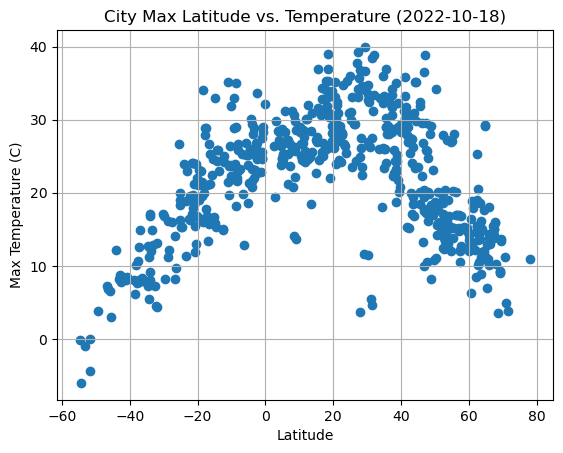

In [11]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x,y)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')

plt.xlabel('Latitude')

plt.ylabel('Max Temperature (C)')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

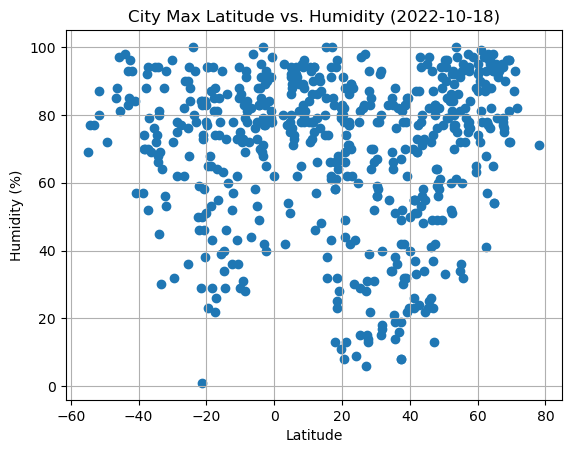

In [12]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x,y)
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022-10-18)')

plt.xlabel('Latitude')

plt.ylabel('Humidity (%)')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

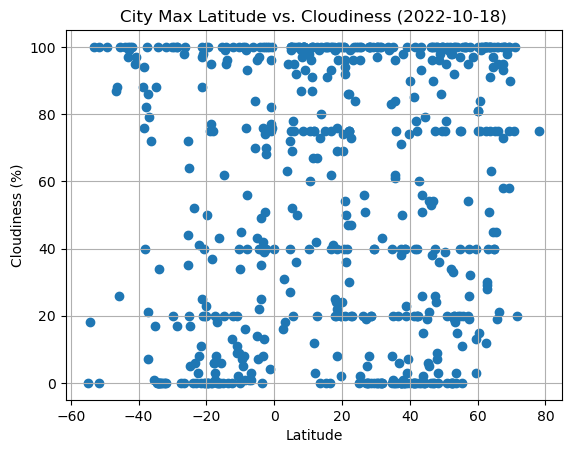

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x,y)
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022-10-18)')

plt.xlabel('Latitude')

plt.ylabel('Cloudiness (%)')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

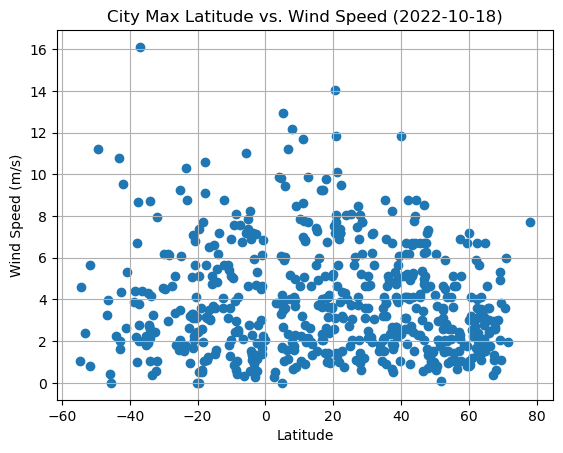

In [14]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x,y)
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2022-10-18)')

plt.xlabel('Latitude')

plt.ylabel('Wind Speed (m/s)')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
from linearreggression import linreg


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tiksi,71.6872,128.8694,3.75,82,20,1.98,RU,1690230691
4,susuman,62.7833,148.1667,14.84,57,28,1.43,RU,1690230693
5,sabang,5.8933,95.3214,28.31,73,95,9.45,ID,1690230693
6,aasiaat,68.7098,-52.8699,3.51,96,98,3.01,GL,1690230694
7,smithers,54.7804,-127.1743,15.18,72,75,1.03,CA,1690230590


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-4.42,87,100,0.82,CL,1690230691
2,waitangi,-43.9535,-176.5597,12.12,98,100,2.24,NZ,1690230692
3,vanimo,-2.6741,141.3028,24.97,89,51,1.33,PG,1690230693
8,adamstown,-25.0660,-130.1015,19.94,68,64,3.52,PN,1690230694
10,minas de marcona,-15.2119,-75.1103,16.71,63,0,6.62,PE,1690230695


###  Temperature vs. Latitude Linear Regression Plot

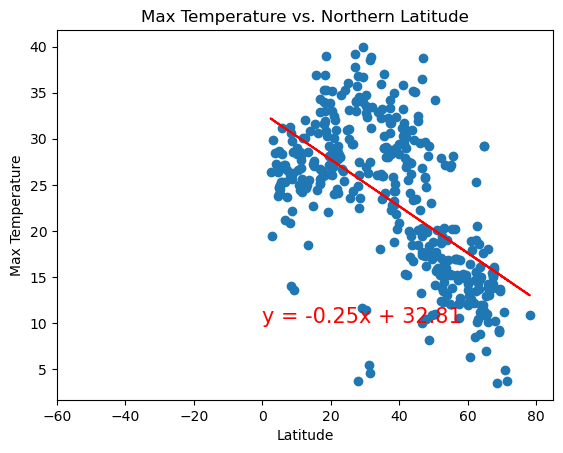

The r-value is: -0.6132634513960301


In [22]:
# Linear regression on Northern Hemisphere
northern_hemisphere_plt_maxTemp = linreg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature', 'Max Temperature vs. Northern Latitude')

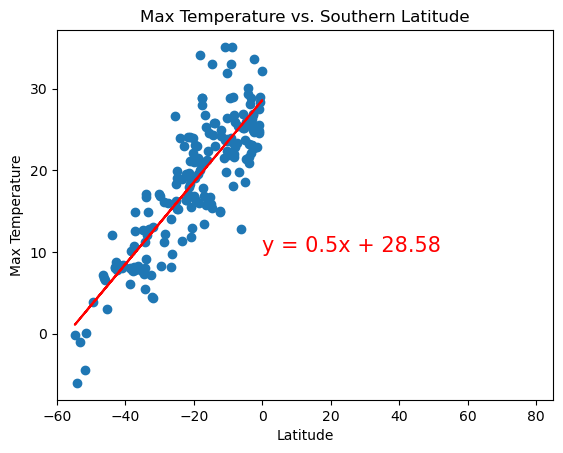

The r-value is: 0.8489244563296447


In [23]:
# Linear regression on Southern Hemisphere
southern_hemisphere_plt_maxTemp = linreg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature', 'Max Temperature vs. Southern Latitude')


**Discussion about the linear relationship:** For the Northern hemisphere there is a negative relationship between the Maximum temperature and the further you get away from the Equator. The r-value for the Northern hemisphere is -0.59.  For the Southern hemisphere there is a negative relationship (even though the slope is positive) between the Maximum temperature and the further you get from the Equator.  The r-value for the Southern hemisphere is around 0.82 meaning there is a strong correlation between Maximum temperature and the further away from the equator you go.  Both the Northern and Southern hemispheres show that the further from the equator you go either Southernly or Northernly, the Max Temperature will start to drop.

### Humidity vs. Latitude Linear Regression Plot

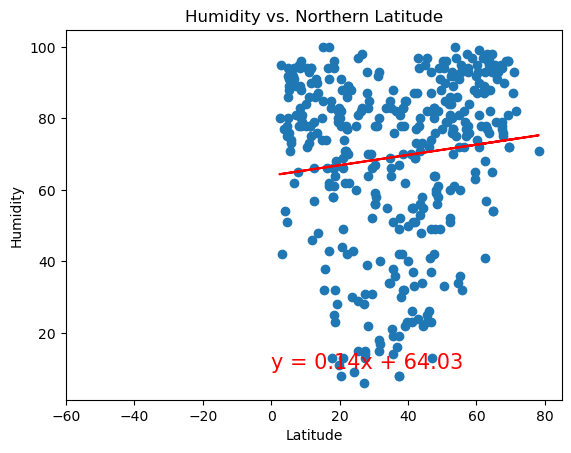

The r-value is: 0.11695890791261711


In [24]:
# Northern Hemisphere
northern_hemisphere_plt_humidity = linreg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Humidity vs. Northern Latitude')


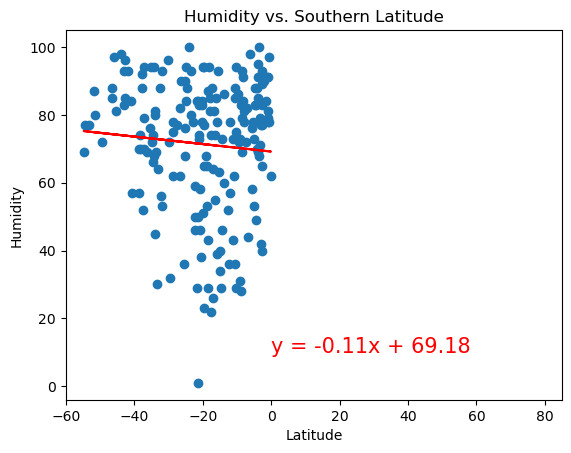

The r-value is: -0.07700247441227695


In [25]:
# Southern Hemisphere
southern_hemisphere_plt_humidity = linreg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Humidity vs. Southern Latitude')


**Discussion about the linear relationship:** Between the Northern and Southern hemispheres there really isnt much difference between the amount of rain (or humidity).  This is shown by the Northern r-value being -0.026 and the Southern hemisphere r-value being -0.022 which is very close to zero meaning there isn't much correlation.

### Cloudiness vs. Latitude Linear Regression Plot

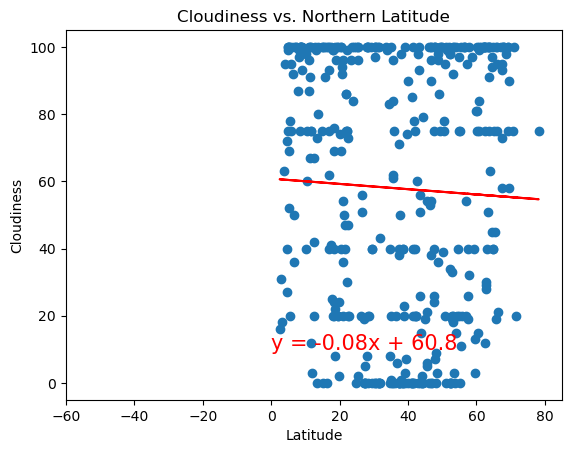

The r-value is: -0.03927324685554108


In [26]:
# Northern Hemisphere
northern_hemisphere_plt_humidity = linreg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Cloudiness vs. Northern Latitude')


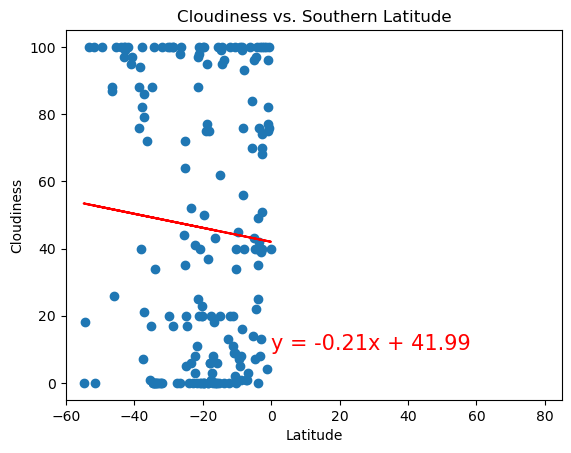

The r-value is: -0.07153113925849341


In [27]:
# Southern Hemisphere
southern_hemisphere_plt_humidity = linreg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Cloudiness vs. Southern Latitude')


**Discussion about the linear relationship:** Again between the Northern and Southern hemisphere's there doesn't appear to be much differnce between the amount of cloud cover.  The r-value's for both the Northern and Southern hemisphere's are very close to 0 representing little to no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

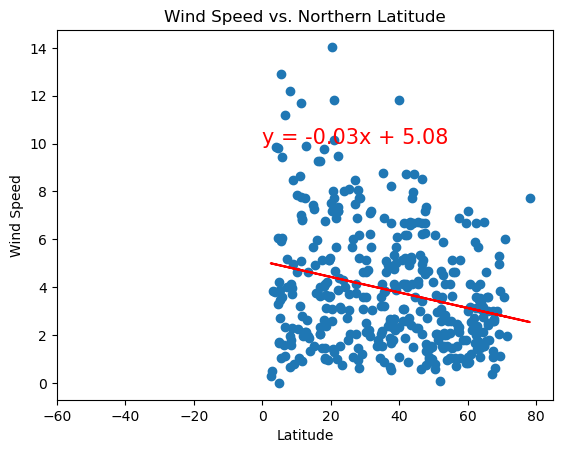

The r-value is: -0.24578313491855905


In [28]:
# Northern Hemisphere
northern_hemisphere_plt_humidity = linreg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Wind Speed vs. Northern Latitude')


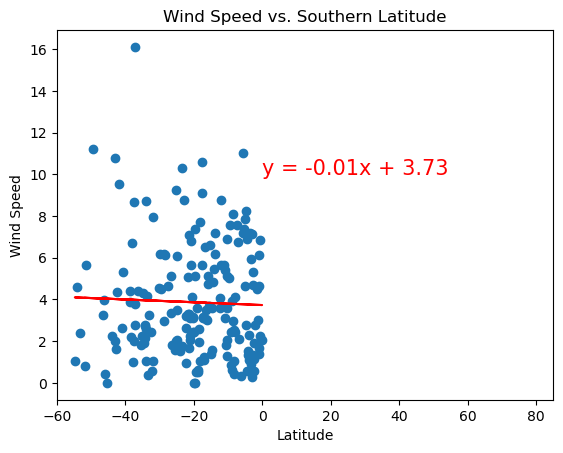

The r-value is: -0.0335734725118113


In [29]:
# Southern Hemisphere
southern_hemisphere_plt_humidity = linreg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Wind Speed vs. Southern Latitude')


**Discussion about the linear relationship:** Again between the Northern and Southern hemisphere's there doesn't appear to be much differnce between Wind Speed.  The r-value's for both the Northern and Southern hemisphere's are very close to 0 representing little to no correlation.  